In [1]:
import  pandas as pd 
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [3]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
df.total_bill.max()

50.81

In [6]:
%matplotlib inline

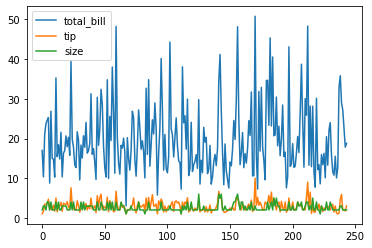

In [7]:
df.plot()

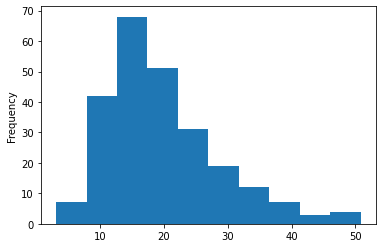

In [8]:
df['total_bill'].plot(kind = 'hist')

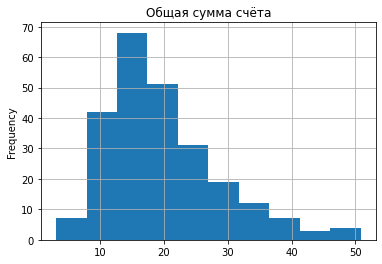

In [9]:
df['total_bill'].plot(kind = 'hist', grid = True, title = 'Общая сумма счёта')

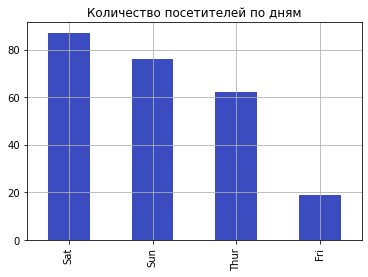

In [10]:
df['day'].value_counts().plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm', 
                              title = 'Количество посетителей по дням')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x115ec89a0>,
      dtype=object)

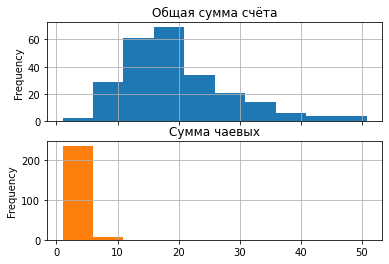

In [11]:
df[['total_bill', 'tip']].plot(kind = 'hist', 
                               grid = True, 
                               subplots = True, 
                               title = ['Общая сумма счёта', 'Сумма чаевых'], 
                               legend = False)

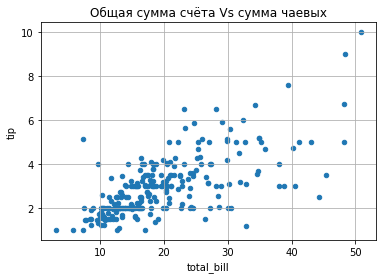

In [12]:
df.plot(x = 'total_bill', 
        y = 'tip', 
        kind = 'scatter', 
        grid = True, 
        title = 'Общая сумма счёта Vs сумма чаевых')

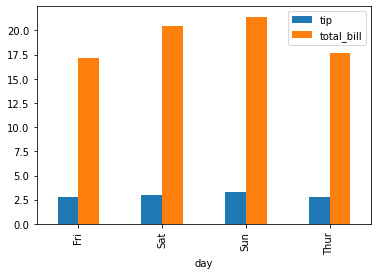

In [13]:
df.pivot_table(values = ['total_bill', 'tip'], 
               index = 'day', 
               aggfunc = 'mean').plot(kind = 'bar')

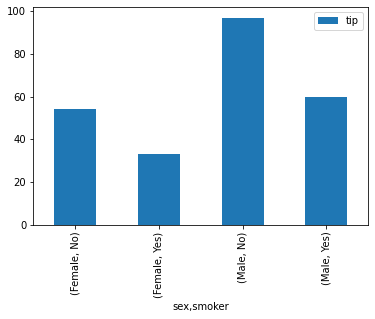

In [14]:
df.pivot_table(values = 'tip', index = ['sex', 'smoker'], aggfunc = 'count').plot(kind = 'bar')

In [15]:
df.pivot_table(values = 'tip', index = ['sex', 'smoker'], aggfunc = 'count')

tip
sex    smoker     
Female No       54
       Yes      33
Male   No       97
       Yes      60

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('tips1.csv')

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <a list of 10 Patch objects>)

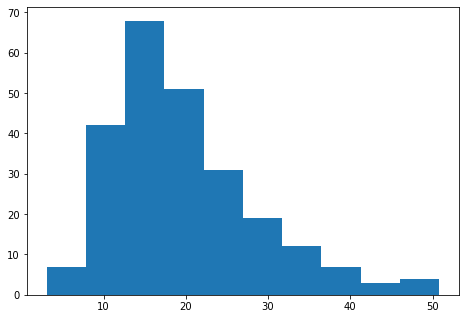

In [17]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'])

Text(0.5, 0, 'Сумма заказа, USD')

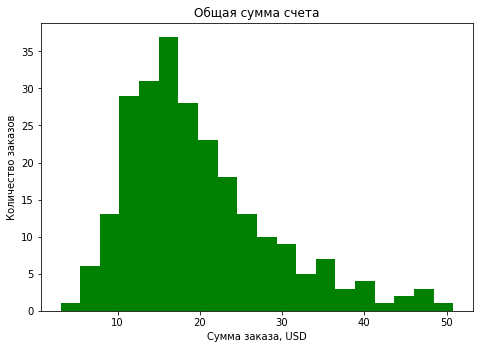

In [18]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'], bins = 20, color = 'green')
axes.set_title('Общая сумма счета')
axes.set_ylabel('Количество заказов')
axes.set_xlabel('Сумма заказа, USD')

Text(0, 0.5, 'Размер чаевых')

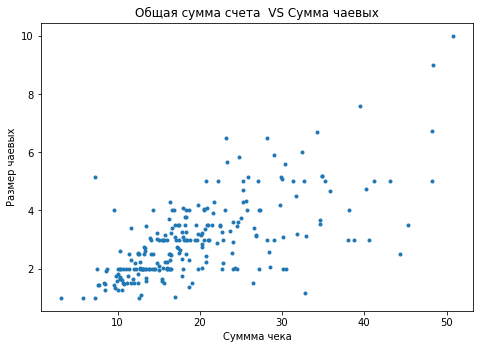

In [27]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x = df['total_bill'], y = df['tip'], marker = '.')
axes.set_title('Общая сумма счета  VS Сумма чаевых')
axes.set_xlabel('Суммма чека')
axes.set_ylabel('Размер чаевых')

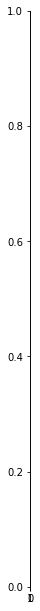

In [32]:
fig1 = plt.figure()
axes1 = fig1.add_axes([2,0,0,2])


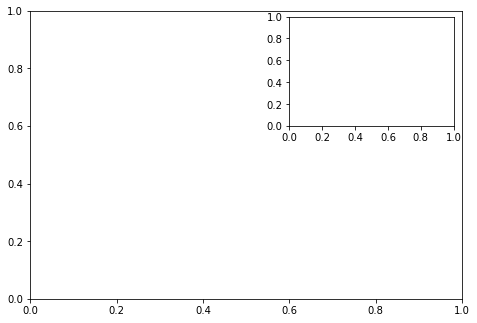

In [33]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])

In [38]:
bills_per_day = df.groupby(['day'])['total_bill'].agg(['min', 'max']).reset_index()
bills_per_day

,day,min,max
0,Fri,5.75,40.17
1,Sat,3.07,50.81
2,Sun,7.25,48.17
3,Thur,7.51,43.11


<BarContainer object of 4 artists>

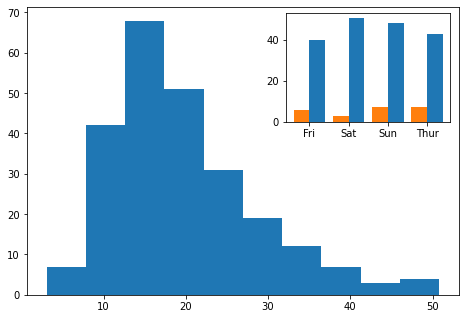

In [50]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['max'], 
                width = 0.4, align = 'edge')
insert_axes.bar(x = bills_per_day['day'], height = bills_per_day['min'],
               width = -0.4, align = 'edge')

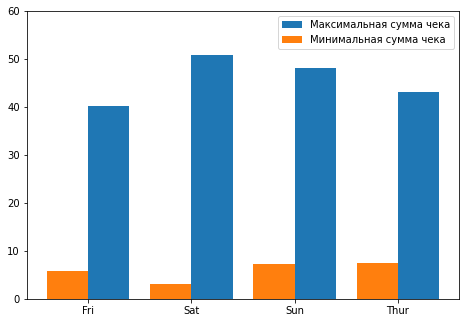

In [49]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.set_ylim(0, 60)
axes.bar(x = bills_per_day['day'], height = bills_per_day['max'], 
                width = 0.4, align = 'edge', label = 'Максимальная сумма чека')
axes.bar(x = bills_per_day['day'], height = bills_per_day['min'], 
                width = -0.4, align = 'edge', label = 'Минимальная сумма чека')
axes.legend(loc = 1)

In [51]:
import numpy as np 

In [52]:
x = np.linspace(start=-3., stop=3., num=1000)
y1 = np.exp(x)

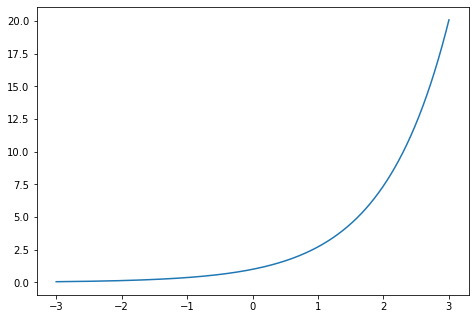

In [53]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1) 

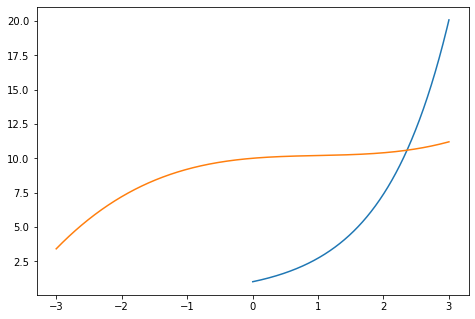

In [54]:
y2 = 10 + 0.4*x - 0.3*x**2 + 0.1*x**3

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[500:], y1[500:]) 
axes.plot(x, y2)

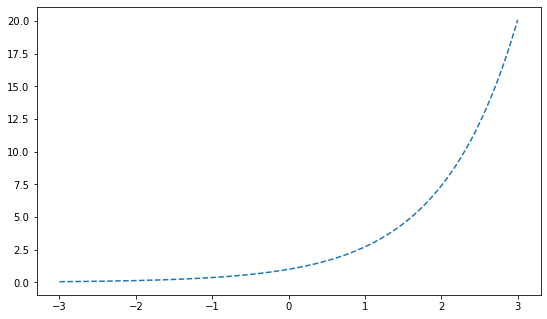

In [55]:
fig = plt.figure(figsize=(7, 4))
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y1, linestyle='--')

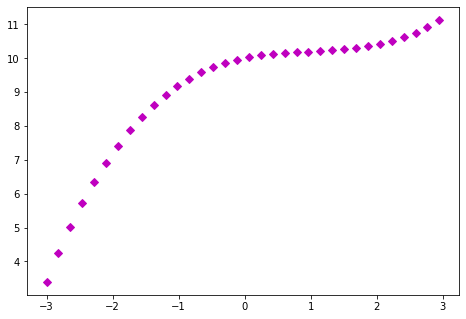

In [56]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[::30], y2[::30], 'mD')

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [58]:
import warnings; warnings.simplefilter('ignore')

In [59]:
df = pd.read_csv('tips1.csv')

In [60]:
sns.set()

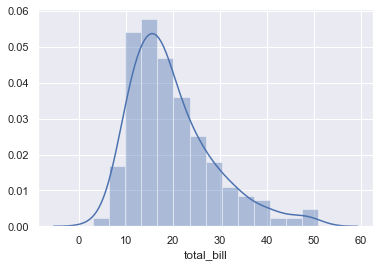

In [63]:
sns.distplot(df['total_bill'])

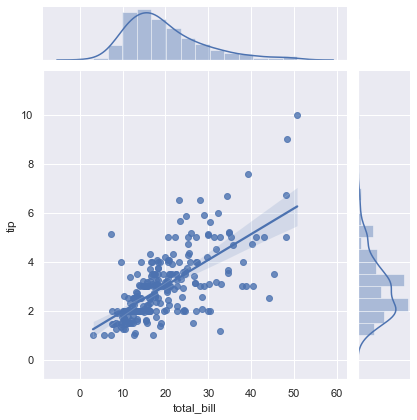

In [66]:
sns.jointplot(x = 'total_bill', y = 'tip', data = df, kind = 'reg')

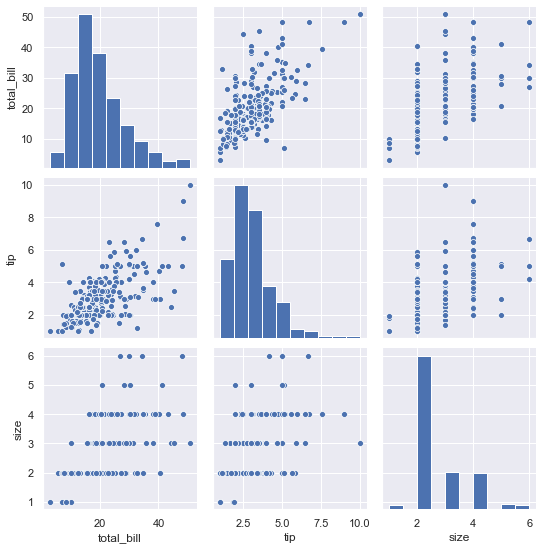

In [67]:
sns.pairplot(df)

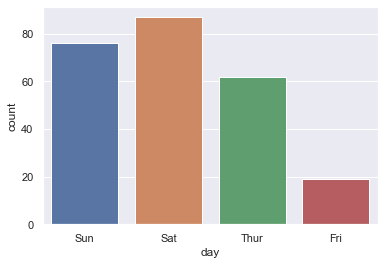

In [68]:
sns.countplot(x = 'day', data = df)

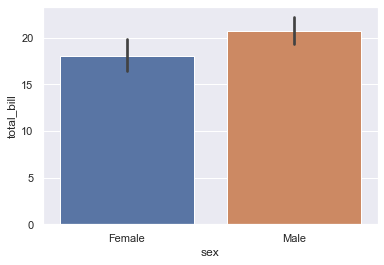

In [69]:
sns.barplot(x = 'sex', y = 'total_bill', data = df)

In [70]:
df.groupby(['sex']).total_bill.mean()

sex
Female    18.056897
Male      20.744076
Name: total_bill, dtype: float64

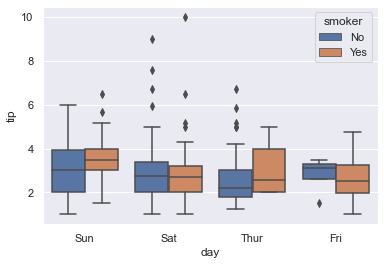

In [72]:
sns.boxplot(x = 'day', y = 'tip', data = df, hue = 'smoker')

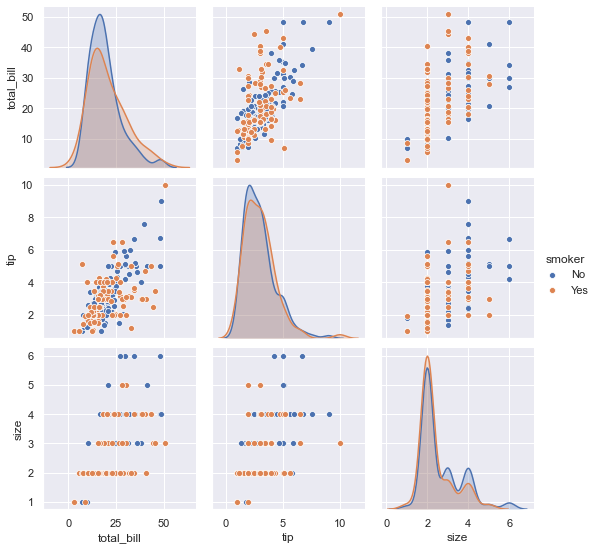

In [73]:
sns.pairplot(df, hue = 'smoker')

In [74]:
correlation = df.corr()

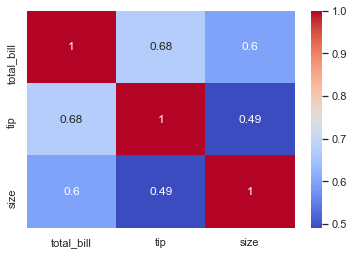

In [75]:
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

In [76]:
!pip install plotly

     |████████████████████████████████| 13.2 MB 1.6 MB/s eta 0:00:01    |████████████                    | 4.9 MB 7.8 MB/s eta 0:00:02     |█████████████████████████▌      | 10.5 MB 1.6 MB/s eta 0:00:02     |██████████████████████████████▎ | 12.5 MB 1.6 MB/s eta 0:00:01     |████████████████████████████████| 13.2 MB 191 kB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11430 sha256=cda959ce8294d4712c0d0e818800717b175df9b14a4dfaa06c74f5793732256e
  Stored in directory: /Users/Ivan/Library/Caches/pip/wheels/c4/a7/48/0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [77]:
!pip install cufflinks

     |████████████████████████████████| 81 kB 1.4 MB/s eta 0:00:01


  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67921 sha256=8e1cdf3b4c24ef5eb2445d97f6b38f41a61d19a67e83bd1357a5ba01815208f2
  Stored in directory: /Users/Ivan/Library/Caches/pip/wheels/6b/76/62/6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
Successfully built cufflinks


In [78]:
import pandas as pd
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline

In [79]:
init_notebook_mode(connected = True)
cf.go_offline()

In [80]:
df = pd.read_csv('tips1.csv')

In [82]:
df.iplot()

In [83]:
df[['total_bill', 'tip']].iplot(kind  = 'spread')

In [84]:
df.iplot(kind= 'bubble', x = 'total_bill', y = 'size', size = 'tip')

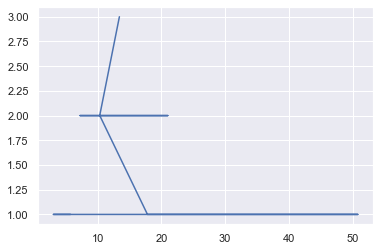

In [85]:
df['total_bill'].value_counts().plot()

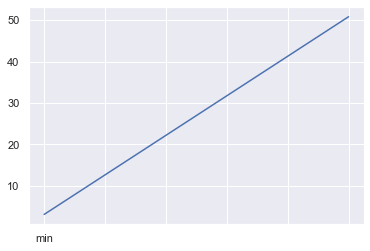

In [86]:
df['total_bill'].agg(['min','max']).plot()

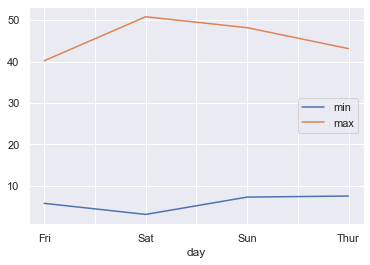

In [87]:
df.groupby(by = 'day')['total_bill'].agg(['min','max']).plot()

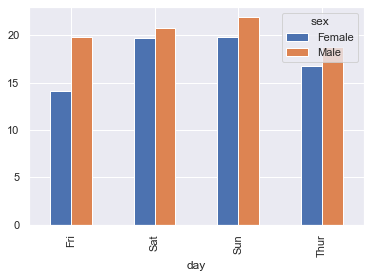

In [88]:
df.pivot_table(index = 'day', columns = 'sex', values = 'total_bill', aggfunc = 'mean').plot(kind = 'bar')